
### CE515 Data Science and Analytics - Term Project 
##### PROJECT: "Company Bankruptcy Prediction with Naive Bayes Algoritm", by "A. Aylin Tokuç"


In [2]:
#the Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedShuffleSplit


In [3]:
#external class to print pretty confusion matrices 
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [5]:
#the Database
dataset = pd.read_csv('polish_all_years.csv', delimiter=",", error_bad_lines=False, 
                      header=None, na_values='-',na_filter=False ) 
dataset = dataset.apply (pd.to_numeric, errors='coerce')
dataset = dataset.fillna(0)

#Following features will be used
# 1.net profit / total assets 
# 2.total liabilities / total assets 
# 3.working capital / total assets 
# 4.current assets / short-term liabilities 
# 5.[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365 
# 6.retained earnings / total assets 
# 7.EBIT / total assets 
# 8.book value of equity / total liabilities 
# 9.sales / total assets 
# 10.equity / total assets 
# 11.(gross profit + extraordinary items + financial expenses) / total assets 
# 12.gross profit / short-term liabilities 
# 13.(gross profit + depreciation) / sales 
# 14.(gross profit + interest) / total assets 
# 15.(total liabilities * 365) / (gross profit + depreciation) 
# 16.(gross profit + depreciation) / total liabilities 
# 17.total assets / total liabilities 
# 18.gross profit / total assets 
# 19.gross profit / sales 
ClassSet = dataset.values 

Xset = ClassSet[:, 0:19] #1:19
Yset = ClassSet[:, 64] # target or class set

/home/aylin/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,1,2,5,6,8,9,10,12,13,17,18,19,21,22,24,28,29,30,34,35,37,38,41,42,43,47,48,50,54,55,56,57,58,61,64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:

# Year 1 has 7.027 records, where  271 of them bankruptcy 4%	  6.756   	 7.027   
# Year 2 has 17.200 records, where  400 of them bankruptcy 4%	 16.800   	 17.200   
# Year 3 has 27.703 records, where  495 of them bankruptcy 5%	 27.208   	 27.703   
# Year 4 has 37.495 records, where  514 of them bankruptcy 5%	 36.981   	 37.495   
# Year 5 has 43.405 records, where  410 of them bankruptcy 7%	 42.995   	 43.405   
# The dataset is imbalanced. 2.090 Class 1 and 41.315 Class 0. We will make class distribution equal


In [7]:
# We will use Train_test_split function to split the data into training set and test set with split ratio as 70:30.

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.7, random_state=0)
sss.get_n_splits(Xset, Yset)

for train_index, test_index in sss.split(Xset, Yset):
   #print("TRAIN:", train_index, "TEST:", test_index)
   Xset_train, Xset_test = Xset[train_index], Xset[test_index]
   Yset_train, Yset_test = Yset[train_index], Yset[test_index]

print ("Xset_train.shape: %s Yset_train.shape: %s" % (Xset_train.shape, Yset_train.shape))
print ("Xset_test.shape: %s Yset_test.shape: %s" % (Xset_test.shape, Yset_test.shape))


Xset_train.shape: (13021, 19) Yset_train.shape: (13021,)
Xset_test.shape: (30385, 19) Yset_test.shape: (30385,)


GaussianNB: Number of mislabeled points out of a total 13021 points : 28648
Confusion Matrix: 
[[  299 28622]
 [   26  1438]] 
Accuracy: 5.72% ; Precision: 92.00% ; Recall: 1.03%
Confusion matrix, without normalization
[[  299 28622]
 [   26  1438]]


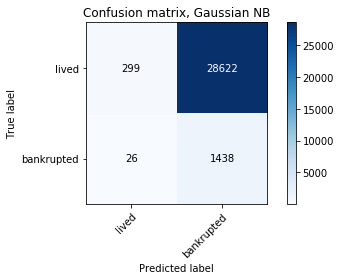

In [8]:
gnb = GaussianNB()
y_pred = gnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("GaussianNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

class_names = []
class_names.append("lived")
class_names.append("bankrupted")
plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Gaussian NB')

/home/aylin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier: Number of mislabeled points out of a total 13021 points : 1553
Confusion Matrix: 
[[28795   126]
 [ 1427    37]] 
Accuracy: 94.89% ; Precision: 95.28% ; Recall: 99.56%
Confusion matrix, without normalization
[[28795   126]
 [ 1427    37]]


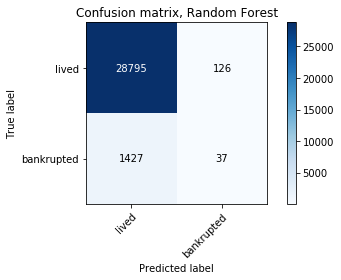

In [9]:
rndF = RandomForestClassifier()
y_pred = rndF.fit(Xset_train, Yset_train).predict(Xset_test)
print("RandomForestClassifier: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))



cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Random Forest')

BernoulliNB: Number of mislabeled points out of a total 13021 points : 6465
Confusion Matrix: 
[[23261  5660]
 [  805   659]] 
Accuracy: 78.72% ; Precision: 96.66% ; Recall: 80.43%
Confusion matrix, without normalization
[[23261  5660]
 [  805   659]]


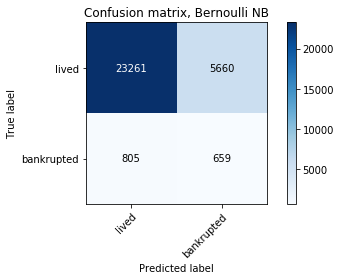

In [10]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("BernoulliNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Bernoulli NB')

In [11]:
#no need initially, try anyways

# Feature Scaling
# We will use standardize scaling so that to use the same fitted method to transform/scale test data.
sc = StandardScaler() 
Xset_train = sc.fit_transform(Xset_train) 
Xset_test = sc.fit_transform(Xset_test)

GaussianNB: Number of mislabeled points out of a total 13021 points : 27616
Confusion Matrix: 
[[ 1373 27548]
 [   68  1396]] 
Accuracy: 9.11% ; Precision: 95.28% ; Recall: 4.75%
Confusion matrix, without normalization
[[ 1373 27548]
 [   68  1396]]


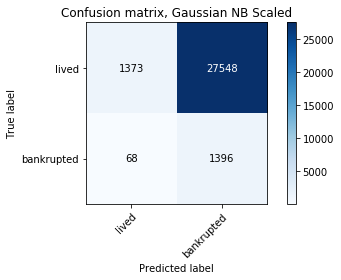

In [12]:
gnb = GaussianNB()
y_pred = gnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("GaussianNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Gaussian NB Scaled')

/home/aylin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier: Number of mislabeled points out of a total 13021 points : 1551
Confusion Matrix: 
[[28817   104]
 [ 1447    17]] 
Accuracy: 94.90% ; Precision: 95.22% ; Recall: 99.64%
Confusion matrix, without normalization
[[28817   104]
 [ 1447    17]]


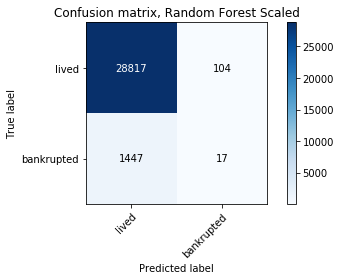

In [13]:
rndF = RandomForestClassifier()
y_pred = rndF.fit(Xset_train, Yset_train).predict(Xset_test)
print("RandomForestClassifier: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Random Forest Scaled')

BernoulliNB: Number of mislabeled points out of a total 13021 points : 9356
Confusion Matrix: 
[[20160  8761]
 [  595   869]] 
Accuracy: 69.21% ; Precision: 97.13% ; Recall: 69.71%
Confusion matrix, without normalization
[[20160  8761]
 [  595   869]]


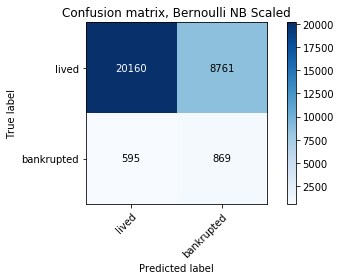

In [14]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("BernoulliNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Bernoulli NB Scaled')

In [15]:
# all features
Xset = ClassSet[:, 0:63] #1:64
Yset = ClassSet[:, 64] # target or class set

# We will use Train_test_split function to split the data into training set and test set with split ratio as 70:30.
sss = StratifiedShuffleSplit(n_splits=2, test_size=0.7, random_state=0)
sss.get_n_splits(Xset, Yset)

for train_index, test_index in sss.split(Xset, Yset):
   #print("TRAIN:", train_index, "TEST:", test_index)
   Xset_train, Xset_test = Xset[train_index], Xset[test_index]
   Yset_train, Yset_test = Yset[train_index], Yset[test_index]

print ("Xset_train.shape: %s Yset_train.shape: %s" % (Xset_train.shape, Yset_train.shape))
print ("Xset_test.shape: %s Yset_test.shape: %s" % (Xset_test.shape, Yset_test.shape))

Xset_train.shape: (13021, 63) Yset_train.shape: (13021,)
Xset_test.shape: (30385, 63) Yset_test.shape: (30385,)


GaussianNB: Number of mislabeled points out of a total 13021 points : 28018
Confusion Matrix: 
[[  956 27965]
 [   53  1411]] 
Accuracy: 7.79% ; Precision: 94.75% ; Recall: 3.31%
Confusion matrix, without normalization
[[  956 27965]
 [   53  1411]]


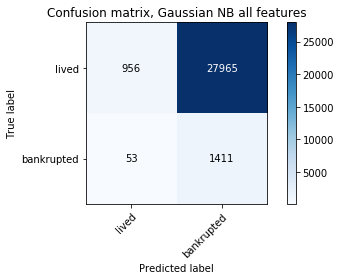

In [16]:
gnb = GaussianNB()
y_pred = gnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("GaussianNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Gaussian NB all features')

/home/aylin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier: Number of mislabeled points out of a total 13021 points : 1410
Confusion Matrix: 
[[28835    86]
 [ 1324   140]] 
Accuracy: 95.36% ; Precision: 95.61% ; Recall: 99.70%
Confusion matrix, without normalization
[[28835    86]
 [ 1324   140]]


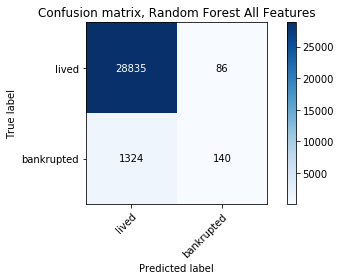

In [17]:
rndF = RandomForestClassifier()
y_pred = rndF.fit(Xset_train, Yset_train).predict(Xset_test)
print("RandomForestClassifier: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Random Forest All Features')

BernoulliNB: Number of mislabeled points out of a total 13021 points : 6548
Confusion Matrix: 
[[23151  5770]
 [  778   686]] 
Accuracy: 78.45% ; Precision: 96.75% ; Recall: 80.05%
Confusion matrix, without normalization
[[23151  5770]
 [  778   686]]


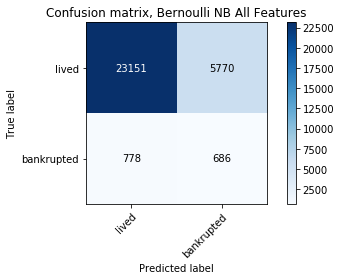

In [18]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("BernoulliNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Bernoulli NB All Features')

In [19]:
# most important 20 features
Xset = ClassSet[:, [15,51,31,27,4,39,8,10,58,22,24,54,16,13,28,12,57,29,56,55]] #from paper
Yset = ClassSet[:, 64] # target or class set

# We will use Train_test_split function to split the data into training set and test set with split ratio as 70:30.
Xset_train, Xset_test, Yset_train, Yset_test = train_test_split(Xset, Yset, test_size = 0.3)
print ("Xset_train.shape: %s Yset_train.shape: %s" % (Xset_train.shape, Yset_train.shape))
print ("Xset_test.shape: %s Yset_test.shape: %s" % (Xset_test.shape, Yset_test.shape))

Xset_train.shape: (30384, 20) Yset_train.shape: (30384,)
Xset_test.shape: (13022, 20) Yset_test.shape: (13022,)


GaussianNB: Number of mislabeled points out of a total 30384 points : 12121
Confusion Matrix: 
[[  315 12098]
 [   23   586]] 
Accuracy: 6.92% ; Precision: 93.20% ; Recall: 2.54%
Confusion matrix, without normalization
[[  315 12098]
 [   23   586]]


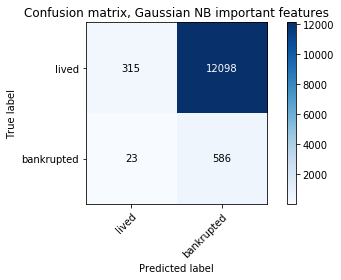

In [20]:
gnb = GaussianNB()
y_pred = gnb.fit(Xset_train, Yset_train).predict(Xset_test)
print("GaussianNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Gaussian NB important features')

BernoulliNB: Number of mislabeled points out of a total 30384 points : 2245
Confusion Matrix: 
[[10524  1889]
 [  356   253]] 
Accuracy: 82.76% ; Precision: 96.73% ; Recall: 84.78%
Confusion matrix, without normalization
[[10524  1889]
 [  356   253]]


{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

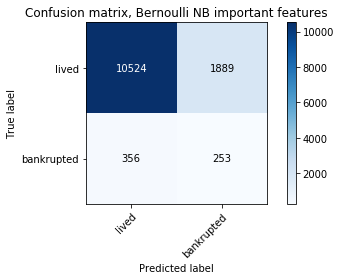

In [21]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xset_train, Yset_train).predict(Xset_test)

print("BernoulliNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Bernoulli NB important features')

bnb.get_params()

/home/aylin/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier: Number of mislabeled points out of a total 30384 points : 648
Confusion Matrix: 
[[12352    61]
 [  587    22]] 
Accuracy: 95.02% ; Precision: 95.46% ; Recall: 99.51%
Confusion matrix, without normalization
[[12352    61]
 [  587    22]]


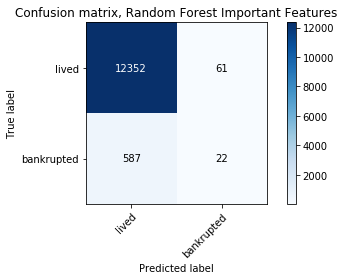

In [22]:
rndF = RandomForestClassifier()
y_pred = rndF.fit(Xset_train, Yset_train).predict(Xset_test)
print("RandomForestClassifier: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Random Forest Important Features')

In [23]:
# most important 9 features
Xset = ClassSet[:, [15,51,31,27,4,39,8,10,58]] #from paper
Yset = ClassSet[:, 64] # target or class set

# We will use Train_test_split function to split the data into training set and test set with split ratio as 70:30.
Xset_train, Xset_test, Yset_train, Yset_test = train_test_split(Xset, Yset, test_size = 0.3)
print ("Xset_train.shape: %s Yset_train.shape: %s" % (Xset_train.shape, Yset_train.shape))
print ("Xset_test.shape: %s Yset_test.shape: %s" % (Xset_test.shape, Yset_test.shape))

Xset_train.shape: (30384, 9) Yset_train.shape: (30384,)
Xset_test.shape: (13022, 9) Yset_test.shape: (13022,)


BernoulliNB: Number of mislabeled points out of a total 30384 points : 963
Confusion Matrix: 
[[11967   435]
 [  528    92]] 
Accuracy: 92.60% ; Precision: 95.77% ; Recall: 96.49%
Confusion matrix, without normalization
[[11967   435]
 [  528    92]]


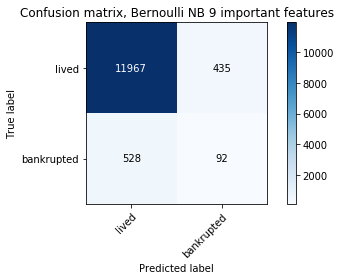

In [24]:
bnb = BernoulliNB()
y_pred = bnb.fit(Xset_train, Yset_train).predict(Xset_test)

print("BernoulliNB: Number of mislabeled points out of a total %d points : %d"
      % (Xset_train.shape[0],(Yset_test != y_pred).sum()))


cm = confusion_matrix(Yset_test, y_pred)
Accuracy = ((cm[0,0]+cm[1,1])/(cm[0,0]+cm[0,1]+cm[1,0]+cm[1,1]))*100
Precision = ((cm[0,0])/(cm[0,0]+cm[1,0]))*100
Recall= ((cm[0,0])/(cm[0,0]+cm[0,1]))*100
print("Confusion Matrix: \n%s " % (cm))
print("Accuracy: %.2f%% ; Precision: %.2f%% ; Recall: %.2f%%" % (Accuracy,Precision,Recall))

plot_confusion_matrix(Yset_test, y_pred, classes=class_names,
                      title='Confusion matrix, Bernoulli NB 9 important features')
